# **ACCESSING DRIVE**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **GETTING DATASET**

In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Colab Notebooks/dataset")))

['test', 'train']


## **IMPORTING LIBRARIES AND APPLYING CONVOLUTIONS**


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
#classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
'''classifier.add(Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))'''
#tf.keras.layers.Dropout(0.2)
# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **GETTING THE IMAGES**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


## **RUNNING THE MODEL**

In [ ]:
batch_size=32
history=classifier.fit(training_set,
steps_per_epoch = 455/batch_size,
epochs = 30,
validation_data = test_set,
validation_steps = 64/batch_size)

Epoch 1/30
14/14 [==============================] - 12s 652ms/step - loss: 13.7559 - accuracy: 0.4337 - val_loss: 0.7811 - val_accuracy: 0.5000
Epoch 2/30
14/14 [==============================] - 9s 648ms/step - loss: 0.6846 - accuracy: 0.5336 - val_loss: 0.6697 - val_accuracy: 0.5469
Epoch 3/30
14/14 [==============================] - 9s 639ms/step - loss: 0.6408 - accuracy: 0.6440 - val_loss: 0.6057 - val_accuracy: 0.7031
Epoch 4/30
14/14 [==============================] - 9s 664ms/step - loss: 0.5799 - accuracy: 0.6961 - val_loss: 0.6024 - val_accuracy: 0.6406
Epoch 5/30
14/14 [==============================] - 9s 692ms/step - loss: 0.5112 - accuracy: 0.7440 - val_loss: 0.5767 - val_accuracy: 0.7031
Epoch 6/30
14/14 [==============================] - 9s 648ms/step - loss: 0.4888 - accuracy: 0.7641 - val_loss: 0.5761 - val_accuracy: 0.7344
Epoch 7/30
14/14 [==============================] - 9s 649ms/step - loss: 0.4805 - accuracy: 0.7671 - val_loss: 0.5091 - val_accuracy: 0.7031
Epoc

## **PLOTTING GRAPH**

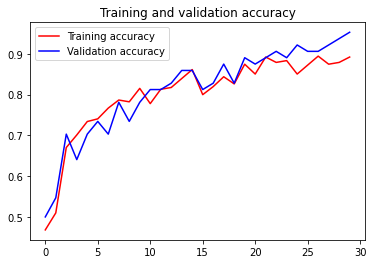

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()